In [1]:
import pandas as pd
import numpy as np
import re
import string
import math
import hashlib
import os

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

### Data Loading

In [2]:
with open(os.path.join("data", "train.csv")) as f:
    # read the training dataset
    df = pd.read_csv(f)

with open(os.path.join("data", "test.csv")) as f:
    # read the test dataset
    X_test = pd.read_csv(f)

df['defects'] = df['defects'].apply(lambda x: 1 if x == True else 0)

X = df.drop(['defects'], axis = 1)
y = df['defects']

# Feature Engineering

### Data Analysis

In [3]:
X.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,50881.000000,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,29376.592059,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25440.500000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,50881.000000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,76321.500000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,101762.000000,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


In [4]:
# scaler = preprocessing.StandardScaler()
# X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
# X_scaled.describe()

In [5]:
X.columns

Index(['id', 'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e',
       'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
       'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'],
      dtype='object')

In [6]:
# mi_scores = mutual_info_classif(X, y)
# mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
# mi_scores = mi_scores.sort_values(ascending=False)

#fig = px.bar(mi_scores.sort_values(ascending=True), orientation='h')
#fig.show()

In [7]:
# fig = px.violin(df, y=np.log(df["v(g)"]+1), x="defects", box = True, orientation="v", color = 'defects',
#                 color_discrete_sequence=["#00939d", "#fe6f5e"])

# fig.update_layout(yaxis_title="v(g)", width = 750, height = 500)
# fig.show()

#fig.write_image('images/clothes_eage.png',width=400, height=500)

In [8]:
# for feat_i in X.columns:
#     #print(feat_i)
#     fig = px.violin(df, y=np.log(df[feat_i]+1), x="defects", box = True, orientation="v", color = 'defects', color_discrete_sequence=["#00939d", "#fe6f5e"])


#     fig.update_layout(yaxis_title=feat_i, width = 400, height = 500)
#     #fig.show()

#     file_name_n = f'images/{feat_i}.png'

#     fig.write_image(file=file_name_n, width=400, height=500)

In [9]:
X_corr = df.drop(columns='id', axis=1)
corr = X_corr.corr()
lower_triangle_mask = np.triu(np.ones(corr.shape)).astype(bool)
cor_mat_lower = corr.mask(lower_triangle_mask)

nice_corrs = []
cols = X_corr.columns
for i in cols:
    # using a 0.25 threshold to decrease the number of features
    corr_i_j = corr[abs(corr)>0.25].loc['defects',i]
    if not np.isnan(corr_i_j) and i != 'defects':
        nice_corrs.append(i)


print(nice_corrs)
print(len(nice_corrs))



['loc', 'v(g)', 'ev(g)', 'n', 'l', 'lOCode', 'lOBlank', 'total_Op', 'total_Opnd', 'branchCount']
10


In [10]:
#Selecting relevant features and scaling them
# X_proc = X[nice_corrs]
# X_proc = X_proc.drop(['defects'], axis = 1)
# scaler = preprocessing.MinMaxScaler()
# d = scaler.fit_transform(X_proc)
# scaled_X_proc = pd.DataFrame(d, columns=X_proc.columns)
## Plots of the distribution of the scaled relevant variables
# scaled_X_corr_box = scaled_X_proc.drop(columns=['defects'])
# fig = px.box(scaled_X_corr_box.melt(), y="value", facet_col="variable", boxmode="overlay", color="variable")
# fig.update_yaxes(matches=None)

# for i in range(len(fig["data"])):
#     yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
#     fig.layout[yaxis_name].showticklabels = True

# fig.update_layout(legend = dict(bgcolor = 'white'))
# fig.update_layout(plot_bgcolor='white')

# fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)
# fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)

# fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
# fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

# fig.show()

### Baseline

In [11]:
AUCs = {}

In [12]:
### Modelling
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_val.shape)
# Simple processing using a MinMax scaler
process = preprocessing.MinMaxScaler()
rf = RandomForestClassifier(max_depth = 3,class_weight="balanced", min_samples_leaf = .03, random_state=42, n_jobs=-1)


pipeline_lr = Pipeline(steps=[('processing',process),
                           ('clf',rf)])


pipeline_lr.fit(X_train, y_train)
y_probas = pipeline_lr.predict_proba(X_val)
y_val_proba_1 = pd.DataFrame(y_probas,columns=['No defect','Defect'])
y_val_pred = y_val_proba_1.Defect.apply(lambda x: 1 if x>0.5 else 0)

AUCs['baseline'] = roc_auc_score(y_val, y_val_pred)

(71234, 22)
(30529, 22)


### Using best correlations

In [13]:
### Modelling
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_val.shape)
# Simple processing using a MinMax scaler
process = preprocessing.MinMaxScaler()
rf = RandomForestClassifier(max_depth = 3,class_weight="balanced", min_samples_leaf = .03, random_state=42, n_jobs=-1)


pipeline_lr = Pipeline(steps=[('processing',process),
                           ('clf',rf)])

features = nice_corrs

X_train_corr = X_train[features]
X_val_corr = X_val[features]
pipeline_lr.fit(X_train_corr, y_train)
y_probas = pipeline_lr.predict_proba(X_val_corr)
y_val_proba_1 = pd.DataFrame(y_probas,columns=['No defect','Defect'])
y_val_pred = y_val_proba_1.Defect.apply(lambda x: 1 if x>0.5 else 0)

AUCs['best_correlations'] = roc_auc_score(y_val, y_val_pred)

(71234, 22)
(30529, 22)


### Stratifying train/val split according to target

In [14]:
### Modelling
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)
print(X_train.shape)
print(X_val.shape)
# Simple processing using a MinMax scaler
process = preprocessing.StandardScaler()
rf = RandomForestClassifier(max_depth = 3,class_weight="balanced", min_samples_leaf = .03, random_state=42, n_jobs=-1)


pipeline_lr = Pipeline(steps=[('processing',process),
                           ('clf',rf)])

features = nice_corrs

X_train_corr = X_train[features]
X_val_corr = X_val[features]
pipeline_lr.fit(X_train_corr, y_train)
y_probas = pipeline_lr.predict_proba(X_val_corr)
y_val_proba_1 = pd.DataFrame(y_probas,columns=['No defect','Defect'])
y_val_pred = y_val_proba_1.Defect.apply(lambda x: 1 if x>0.5 else 0)

AUCs['stratified'] = roc_auc_score(y_val, y_val_pred)

(71234, 22)
(30529, 22)


### Decreasing number of figures according to violin plots

In [15]:
# Violin plots showed that total_Opnd/total_Op and n/v had similar distributions
red_features_1 = ['loc', 'v(g)', 'ev(g)', 'n', 'l', 'lOCode', 'lOBlank', 'total_Opnd', 'branchCount']
red_features_2 = ['loc', 'v(g)', 'ev(g)', 'n', 'l', 'lOCode', 'lOBlank', 'total_Op', 'branchCount']

In [16]:
### Modelling
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)
print(X_train.shape)
print(X_val.shape)
# Simple processing using a MinMax scaler
process = preprocessing.StandardScaler()
rf = RandomForestClassifier(max_depth = 3,class_weight="balanced", min_samples_leaf = .03, random_state=42, n_jobs=-1)


pipeline_lr = Pipeline(steps=[('processing',process),
                           ('clf',rf)])

features = red_features_1

X_train_corr = X_train[features]
X_val_corr = X_val[features]
pipeline_lr.fit(X_train_corr, y_train)
y_probas = pipeline_lr.predict_proba(X_val_corr)
y_val_proba_1 = pd.DataFrame(y_probas,columns=['No defect','Defect'])
y_val_pred = y_val_proba_1.Defect.apply(lambda x: 1 if x>0.5 else 0)

auc_red_1 = roc_auc_score(y_val, y_val_pred)

(71234, 22)
(30529, 22)


In [17]:
### Modelling
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)
print(X_train.shape)
print(X_val.shape)
# Simple processing using a MinMax scaler
process = preprocessing.StandardScaler()
rf = RandomForestClassifier(max_depth = 3,class_weight="balanced", min_samples_leaf = .03, random_state=42, n_jobs=-1)


pipeline_lr = Pipeline(steps=[('processing',process),
                           ('clf',rf)])

features = red_features_2

X_train_corr = X_train[features]
X_val_corr = X_val[features]
pipeline_lr.fit(X_train_corr, y_train)
y_probas = pipeline_lr.predict_proba(X_val_corr)
y_val_proba_1 = pd.DataFrame(y_probas,columns=['No defect','Defect'])
y_val_pred = y_val_proba_1.Defect.apply(lambda x: 1 if x>0.5 else 0)

auc_red_2 = roc_auc_score(y_val, y_val_pred)

(71234, 22)
(30529, 22)


In [18]:
print('AUC for keeping only total_Opnd: {}'.format(auc_red_1))
print('AUC for keeping only total_Op: {}'.format(auc_red_2))

AUC for keeping only total_Opnd: 0.7236085112421162
AUC for keeping only total_Op: 0.7236423419321991


In [19]:
AUCs['reduced_features'] = auc_red_2

### Trying other classifier models    

In [20]:
def plot_roc_curve(roc_auc, fpr, tpr):
    # Function to plot ROC Curve
    # Note: this is ALL just matplotlib stuff, nothing scientific about it! 
    
    # Inputs: 
    #     roc_auc - AU ROC value (float)
    #     fpr - false positive rate (output of roc_curve()) array
    #     tpr - true positive rate (output of roc_curve()) array
    
    plt.figure(figsize=(8,6))
    lw = 2
    plt.plot(fpr, tpr, color='orange', lw=lw, label='ROC curve (AUROC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='random')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("{} - Receiver Operating Characteristic".format(pipe_dict[i]))
    plt.legend(loc="lower right")
    plt.show()

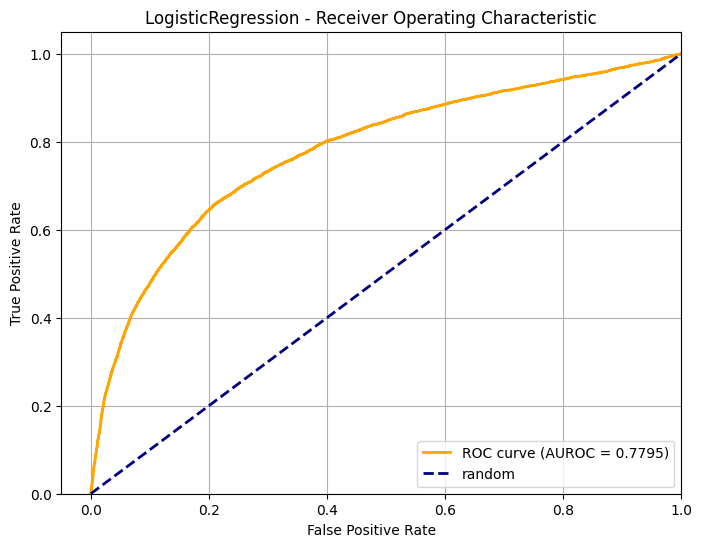

LogisticRegression:  0.7794811952110703


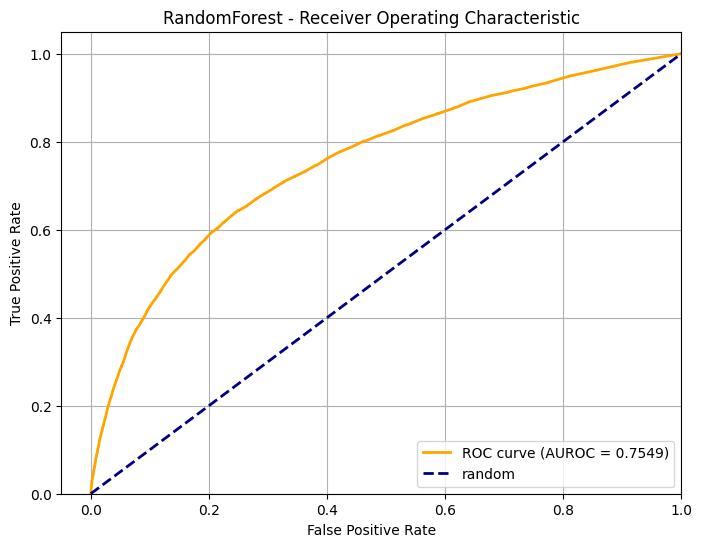

RandomForest:  0.7549348334534073


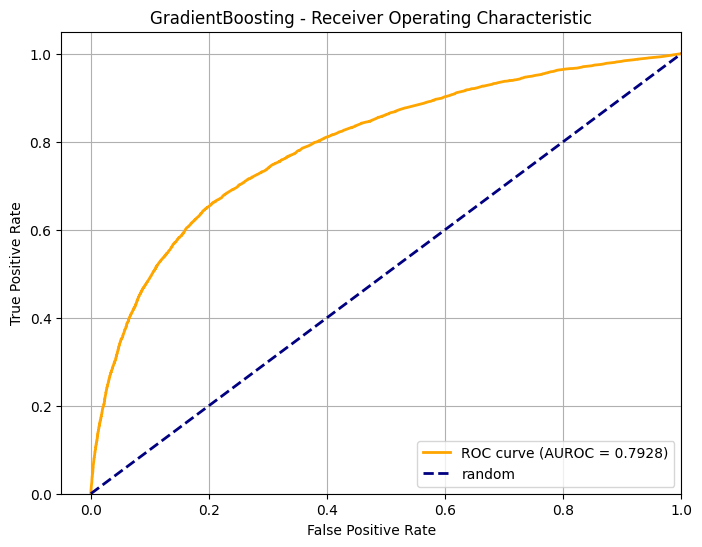

GradientBoosting:  0.7927968177052563


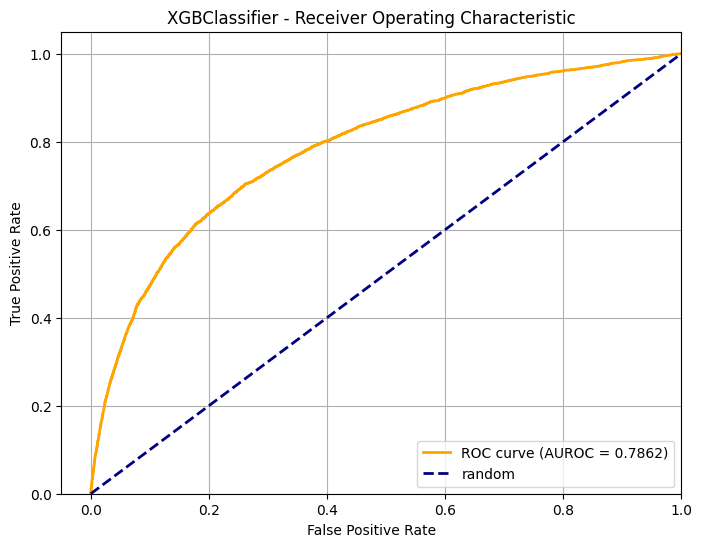

XGBClassifier:  0.7862341137623295


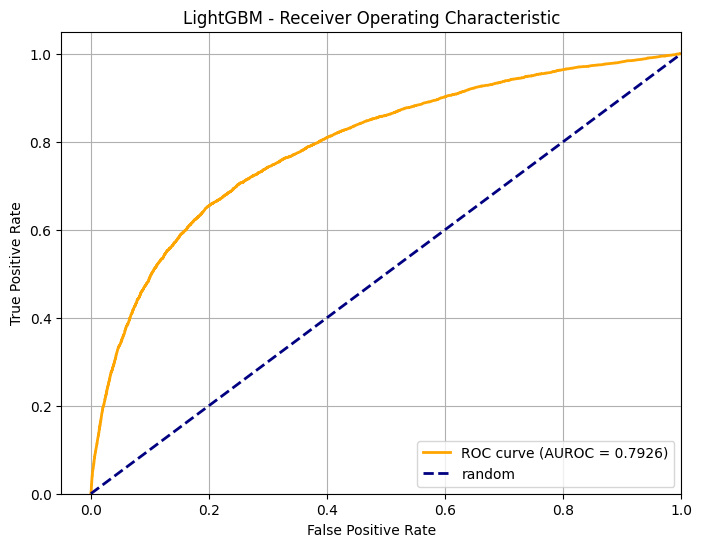

LightGBM:  0.792562757567616
----------------------------------------------------------
Classifier with the best ROC-AUC: GradientBoosting


In [21]:
process = preprocessing.StandardScaler()

pipeline_rf = Pipeline([("processing", process),
                     ('classifier_RandomForest', RandomForestClassifier(random_state=42))])

pipeline_lr = Pipeline([("processing", process),
                     ('classifier_LogisticRegression', LogisticRegression(solver='liblinear', random_state=42))])

pipeline_gb = Pipeline([("processing", process),
                     ('classifier_GradientBoosting', GradientBoostingClassifier(random_state=42))])

pipeline_xgb = Pipeline([("processing", process),
                     ('classifier_XGBClassifier', XGBClassifier(random_state=42))])

pipeline_light = Pipeline(steps=[('processing',process),
                     ('classifier_light', lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42))])

pipelines = [pipeline_lr, pipeline_rf, pipeline_gb,pipeline_xgb, pipeline_light]
pipe_dict = {0: 'LogisticRegression', 1:'RandomForest', 2: 'GradientBoosting',3:'XGBClassifier',4:'LightGBM'}

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)
X_train_mod = X_train[red_features_2]
X_val_mod = X_val[red_features_2]

for pipe in pipelines:
    pipe.fit(X_train_mod, y_train)
best_roc_auc = 0.0
best_classifier = 0
best_pipeline = ''
prediction_dict={}


for i, model in enumerate (pipelines) :

    y_scores = model.predict_proba(X_val_mod)[:,1]
    fpr, tpr, threshold = roc_curve(y_val, y_scores)
    roc_auc = auc(fpr, tpr)
    plot_roc_curve(roc_auc, fpr, tpr)
    
    print(pipe_dict[i]+': ',roc_auc)
    prediction_dict[pipe_dict[i]]=[y_scores, roc_auc]
    AUCs[pipe_dict[i]] = roc_auc

    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
        best_pipeline = model
        best_classifier = i
print('----------------------------------------------------------')
print('Classifier with the best ROC-AUC: {}'.format(pipe_dict[best_classifier]))

In [22]:
AUCs['gradient_boosting'] = 0.7927968177052563

In [23]:
for key, value in AUCs.items():
    print('AUC for {}: {}'.format(key,value))

AUC for baseline: 0.714697516473987
AUC for best_correlations: 0.7185377423435713
AUC for stratified: 0.7239617853079248
AUC for reduced_features: 0.7236423419321991
AUC for LogisticRegression: 0.7794811952110703
AUC for RandomForest: 0.7549348334534073
AUC for GradientBoosting: 0.7927968177052563
AUC for XGBClassifier: 0.7862341137623295
AUC for LightGBM: 0.792562757567616
AUC for gradient_boosting: 0.7927968177052563


### Preparing new submission with non-optimized gradient boosting

In [24]:
### Modelling
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)
# print(X_train.shape)
# print(X_val.shape)

process = preprocessing.StandardScaler()
pipeline_gb = Pipeline([("processing", process),
                     ('classifier_GradientBoosting', GradientBoostingClassifier(random_state=42))])


features = red_features_2

X_train_new_1 = X_train[features]
X_val_new_1 = X_val[features]
pipeline_gb.fit(X_train_new_1, y_train)
y_probas = pipeline_gb.predict_proba(X_val_new_1)
y_val_proba_1 = pd.DataFrame(y_probas,columns=['No defect','Defect'])
y_val_pred = y_val_proba_1.Defect.apply(lambda x: 1 if x>0.5 else 0)
roc_auc_score(y_val, y_val_pred)


0.6594435801850407

In [25]:
for i in np.arange(0.0,1.0,0.05):
    y_val_pred = y_val_proba_1.Defect.apply(lambda x: 1 if x>i else 0)
    print('For a threshold of {}, the AUC is {}.'.format(i,roc_auc_score(y_val, y_val_pred)))

For a threshold of 0.0, the AUC is 0.5.
For a threshold of 0.05, the AUC is 0.5009566987368019.
For a threshold of 0.1, the AUC is 0.6466412396265151.
For a threshold of 0.15000000000000002, the AUC is 0.708434049498404.
For a threshold of 0.2, the AUC is 0.7245799445253814.
For a threshold of 0.25, the AUC is 0.7265951248423781.
For a threshold of 0.30000000000000004, the AUC is 0.7164930812213868.
For a threshold of 0.35000000000000003, the AUC is 0.7068920213624601.
For a threshold of 0.4, the AUC is 0.689166772110191.
For a threshold of 0.45, the AUC is 0.6746839647915961.
For a threshold of 0.5, the AUC is 0.6594435801850407.
For a threshold of 0.55, the AUC is 0.647242445239306.
For a threshold of 0.6000000000000001, the AUC is 0.6205230990491474.
For a threshold of 0.65, the AUC is 0.5943947324394294.
For a threshold of 0.7000000000000001, the AUC is 0.5661034421479896.
For a threshold of 0.75, the AUC is 0.5377326697828978.
For a threshold of 0.8, the AUC is 0.505289080844055.


In [26]:
### Modelling
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)
# print(X_train.shape)
# print(X_val.shape)

process = preprocessing.StandardScaler()
pipeline_xgb = Pipeline([("processing", process),
                     ('classifier_XGBClassifier', XGBClassifier(random_state=42))])


features = red_features_2

X_train_new_2 = X_train[features]
X_val_new_2 = X_val[features]
pipeline_xgb.fit(X_train_new_2, y_train)
y_probas = pipeline_xgb.predict_proba(X_val_new_2)
y_val_proba_1 = pd.DataFrame(y_probas,columns=['No defect','Defect'])
y_val_pred = y_val_proba_1.Defect.apply(lambda x: 1 if x>0.5 else 0)
roc_auc_score(y_val, y_val_pred)

0.6559726732011656

In [27]:
for i in np.arange(0.0,1.0,0.05):
    y_val_pred = y_val_proba_1.Defect.apply(lambda x: 1 if x>i else 0)
    print('For a threshold of {}, the AUC is {}.'.format(i,roc_auc_score(y_val, y_val_pred)))

For a threshold of 0.0, the AUC is 0.5.
For a threshold of 0.05, the AUC is 0.5479439124928325.
For a threshold of 0.1, the AUC is 0.6526257886150254.
For a threshold of 0.15000000000000002, the AUC is 0.7050190413558378.
For a threshold of 0.2, the AUC is 0.7179824059598332.
For a threshold of 0.25, the AUC is 0.7185903085372404.
For a threshold of 0.30000000000000004, the AUC is 0.7103857127177255.
For a threshold of 0.35000000000000003, the AUC is 0.6988230482587311.
For a threshold of 0.4, the AUC is 0.6836228791083414.
For a threshold of 0.45, the AUC is 0.6722221508042571.
For a threshold of 0.5, the AUC is 0.6559726732011656.
For a threshold of 0.55, the AUC is 0.6376960690960243.
For a threshold of 0.6000000000000001, the AUC is 0.6171318822712798.
For a threshold of 0.65, the AUC is 0.594279013910526.
For a threshold of 0.7000000000000001, the AUC is 0.5732069841382944.
For a threshold of 0.75, the AUC is 0.5521960810024193.
For a threshold of 0.8, the AUC is 0.533227363356670

### Oversampling positive cases

In [32]:
df_train, df_val = train_test_split(df, test_size=0.3, random_state=42, stratify = df['defects'])

In [35]:
X_train = df_train.drop(['defects'], axis = 1)
y_train = df_train['defects']
X_val = df_val.drop(['defects'], axis = 1)
y_val = df_val['defects']

ros_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_over, y_over = ros_sampler.fit_resample(X_train, y_train)

In [36]:
pipeline_lr.fit(X_over, y_over)
y_probas = pipeline_lr.predict_proba(X_val)
y_val_proba_1 = pd.DataFrame(y_probas,columns=['No defect','Defect'])
y_val_pred = y_val_proba_1.Defect.apply(lambda x: 1 if x>0.5 else 0)

roc_auc_score(y_val, y_val_pred)


0.724373896554179

In [43]:
pipeline_xgb.fit(X_over, y_over)
y_probas = pipeline_xgb.predict_proba(X_val)
y_val_proba_1 = pd.DataFrame(y_probas,columns=['No defect','Defect'])
y_val_pred = y_val_proba_1.Defect.apply(lambda x: 1 if x>0.45 else 0)

roc_auc_score(y_val, y_val_pred)

0.7146443241480239

In [46]:
pipeline_light.fit(X_over, y_over)
y_probas = pipeline_xgb.predict_proba(X_val)
y_val_proba_1 = pd.DataFrame(y_probas,columns=['No defect','Defect'])
y_val_pred = y_val_proba_1.Defect.apply(lambda x: 1 if x>0.5 else 0)

roc_auc_score(y_val, y_val_pred)

0.7148656882119773

In [47]:
ros_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_over, y_over = ros_sampler.fit_resample(X, y)

In [49]:
pipeline_light.fit(X_over[features],y_over)


### Preparing submission file
y_test_probas = pipeline_gb.predict_proba(X_test[features])
y_test_proba_1 = pd.DataFrame(y_test_probas,columns=['No defect','Defect'])
y_test_pred = y_test_proba_1.Defect.apply(lambda x: 1 if x>0.25 else 0)

output = pd.DataFrame({'id': X_test.id,
                       'defects': y_test_pred})
output.to_csv('10222023_submission.csv', index=False)